In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set(style='whitegrid')

In [3]:
# 1. 데이터정보와 요약통계 확인
# 1.1 데이터 형태 찍어보기 (Head, Tail)
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# 1.2 행과 열의 갯수
tips.shape

(244, 7)

In [6]:
# 1.3 데이터 타입 및 Null
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
# 1.4 데이터 요약 통계
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


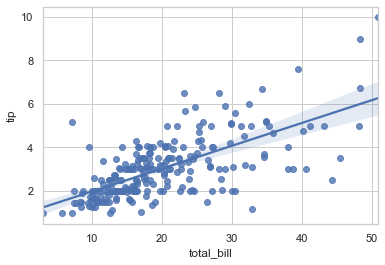

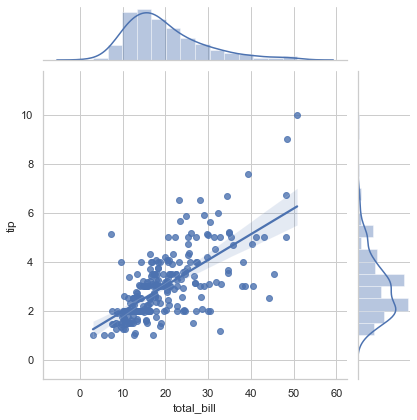

In [10]:
# 2.계산금액과 팁금액 사이의 상관관계
sns.regplot(x="total_bill", y="tip", data=tips)
sns.jointplot(x="total_bill", y="tip", kind='reg', data=tips)

In [11]:
print(tips.corr())

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<AxesSubplot:xlabel='day', ylabel='count'>

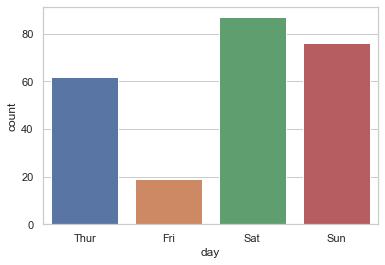

In [17]:
# 3. 요일별 팁 발생횟수
sns.countplot(x='day', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

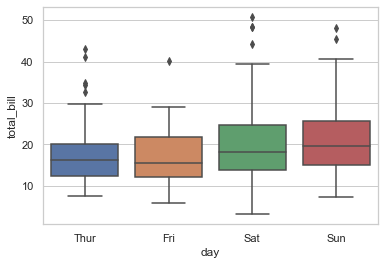

In [12]:
# 4. 요일 별 계산금액의 통계적 분포
sns.boxplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

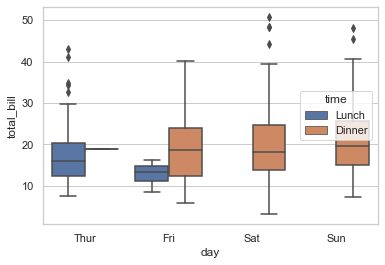

In [13]:
# 4+1. 요일+시간대별 계산금액의 통계적 분포
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

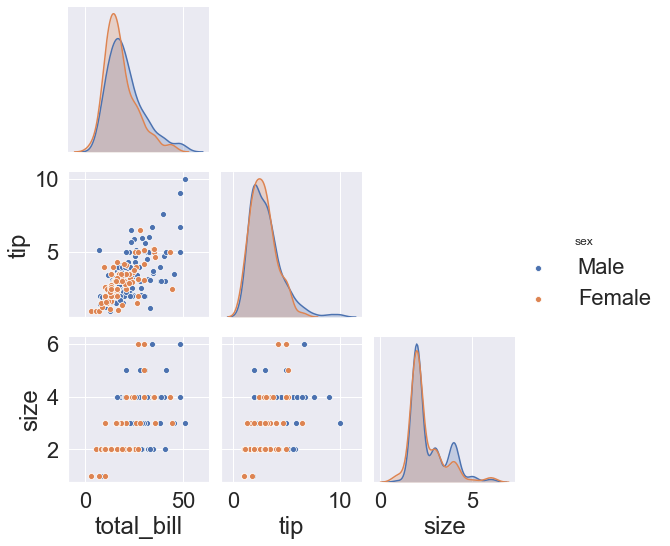

In [49]:
# 5. 계산금액, 팁, 사이즈 각각 상관관계를 가지는지 성별에 따라 구분하여 나타내라
tips_d = tips[[ "total_bill", "tip", "sex", "size"]]
sns.pairplot(data = tips_d, hue = "sex", corner = True)

## 6. 추가적인 EDA 및 인사이트
- 일별 total_bill의 분포와 일별 tip 발생횟수의 차이를 보면 금요일에는 유독 손님이 적고, 매출액도 작은 것을 알 수가 있다.
    - 목요일은 같은 평일임에도 그렇지 않다는 점에서 원인을 규명할 필요가 있어보인다.
    </br>
    </br>
    </br>
    </br>
    </br>
- 테이블 인원 수를 나타내면 해당 식당에서는 2인 손님이 가장 많은 것으로 나타난다.
    - 2인석 테이블을 늘리고, 커플을 위한 할인혜택을 준비하면 매출 향상에 도움이 될 것으로 보인다.
